# IMPORTS

In [1]:

import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

## LOAD DATA

In [2]:
df = pd.read_csv('train.csv')
df['text'] = df['text'].astype(str)

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20800 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# ADDING Column etc.. to be added

In [5]:

df['length_text'] = df['text'].apply(len)
df.head()

,id,title,author,text,label,length_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


## JUST 100 values

In [6]:

X = df['text'][50:150]
y = df['label'][50:150]
len(y)

100

## Plots

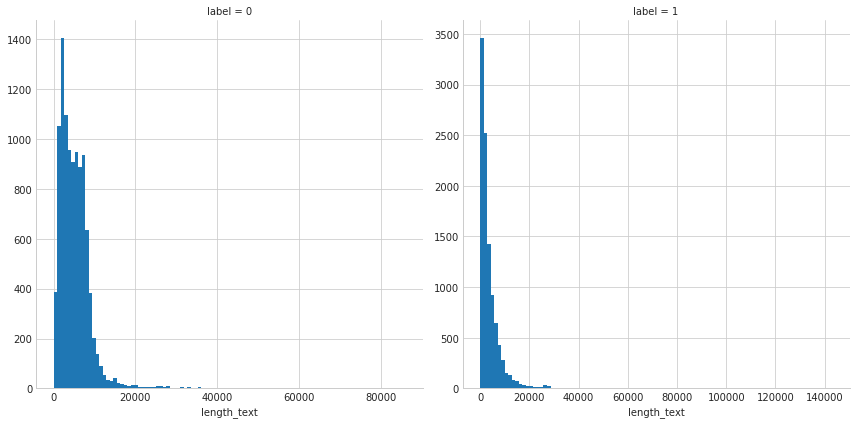

In [7]:
g = sns.FacetGrid(data = df, col = 'label',sharey=False, size = 6,sharex = False)
g = g.map(plt.hist, 'length_text',bins = 100)

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


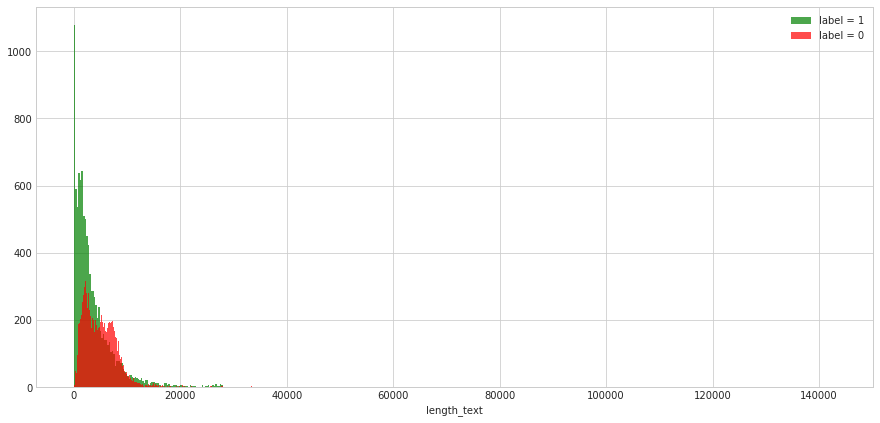

In [8]:
plt.figure(figsize = (15,7))
sns.distplot(df[df['label'] == 1]['length_text'], kde = False,hist_kws={'alpha':.7},label = 'label = 1',color='green',bins = 500)
sns.distplot(df[df['label'] == 0]['length_text'], kde = False,hist_kws={'alpha':.7},label = 'label = 0',color = 'red',bins = 500)
plt.legend()

# WORK TO BE DONE ()

In [9]:
import string

In [10]:
def prep(mess):
    Kill_punc = [char for char in mess if char not in string.punctuation]
    Kill_punc = ''.join(Kill_punc)
    return [word for word in Kill_punc.split() if word.lower() not in stopwords.words('english')]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# Making Bag of Words
cv = CountVectorizer(analyzer=prep)
X = cv.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## USING MULTINOMIAL NAIVE BAYES

In [12]:
from sklearn.naive_bayes import MultinomialNB
zero_model = MultinomialNB()

In [15]:
zero_model.fit(X_train,y_train)
predict = zero_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predict), confusion_matrix(y_test, predict),sep = '\n')

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        19
          1       0.93      0.93      0.93        14

avg / total       0.94      0.94      0.94        33

[[18  1]
 [ 1 13]]


In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

# ==PIPELINE== 

In [18]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=prep)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [19]:
# using just 100 values
X = df['text'][50:150]
y = df['label'][50:150]
len(y)

100

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [21]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function prep at 0x7f00dc8768c8>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
    ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
predictions = pipeline.predict(X_test)

In [23]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[16  1]
 [10  3]]
             precision    recall  f1-score   support

          0       0.62      0.94      0.74        17
          1       0.75      0.23      0.35        13

avg / total       0.67      0.63      0.57        30



#### TF-IDF WAS NOT GOOD BUT IT SHOULD BE.
##### FURTHER INVESTIGATION NEEDED.
##### Result obtained from just using count vectorizer was good.
USE of more powerful techniques required
